# **Overall Trends (Time Only)**
a detailed analysis of the overall **sales and profit** trends over the last four years
- any major fluctuations in sales volumes by month, quarter, and year, 

**Questions:**
1. what are the overall and monthly trends?
2. what are sales by month? Quarter? Year?
3. What months have the highest and lowest sales? Which product (or country or region) have highest or lowest sales? What was avg sales across time?
4. Which products make up the top X% of sales? This is where I'm just taking a metric and slicing it by a specified dimension to understand how that dimension makes up the overall piece of the pie.

### Setup 
1. Import Libraries
2. Import tables
3. Create colour pallette

In [1]:
import numpy as np
import pandas as pd
import csv 
import datetime 
import json
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, HTML

In [3]:
orders = pd.read_csv("/Users/johannaschmidle/Desktop/Superstore/Superstore Cleaned Tables/Orders.csv")
returns = pd.read_csv("/Users/johannaschmidle/Desktop/Superstore/Superstore Cleaned Tables/Returns.csv")
people = pd.read_csv("/Users/johannaschmidle/Desktop/Superstore/Superstore Cleaned Tables/People.csv")
products = pd.read_csv("/Users/johannaschmidle/Desktop/Superstore/Superstore Cleaned Tables/Products.csv")

# Data types for Orders table
with open("/Users/johannaschmidle/Desktop/Superstore/Superstore Cleaned Tables/dtypes.json", "r") as f:
    dtypes = json.load(f)
    
orders = orders.astype(dtypes)

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order ID             9994 non-null   object        
 1   Order Date           9994 non-null   datetime64[ns]
 2   Ship Mode            9994 non-null   object        
 3   Customer ID          9994 non-null   object        
 4   Segment              9994 non-null   object        
 5   City                 9994 non-null   object        
 6   State                9994 non-null   object        
 7   Region               9994 non-null   object        
 8   Product ID           9994 non-null   object        
 9   Category             9994 non-null   object        
 10  Sub-Category         9994 non-null   object        
 11  Product Name         9994 non-null   object        
 12  Sales                9994 non-null   float64       
 13  Quantity             9994 non-nul

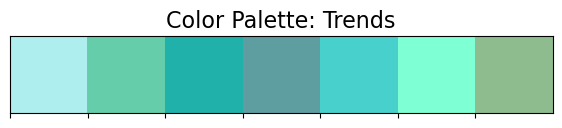

In [7]:
# I am creating a custom colour palette for charts
palette_trends = ["#afeeee", "#66cdaa", "#20b2aa", "#5f9ea0", "#48d1cc", "#7fffd4", "#8fbc8f"]

sns.palplot(palette_trends)
plt.title("Color Palette: Trends", fontsize=16)
plt.show()

### 1. **Overall and Monthly Trends** 
What are sales by time? Or month? is there a pattern in trends of months or seasons that perform the best?

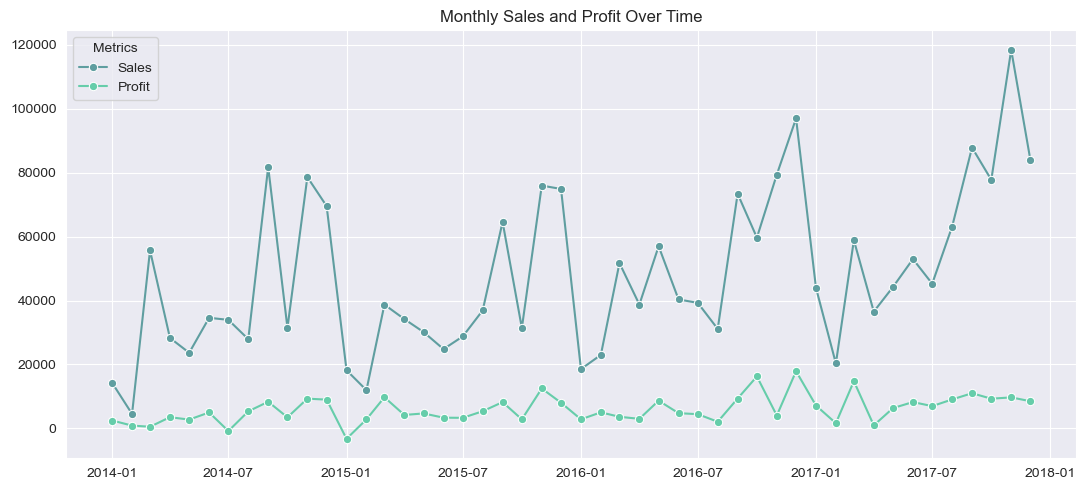

In [13]:
MonthlyData = orders.groupby('Year-Month').agg(Sales=('Sales', 'sum'), Profit=('Profit', 'sum')).reset_index()
MonthlyData['Year-Month'] = MonthlyData['Year-Month'].dt.to_timestamp()
sns.set_style("darkgrid")

plt.figure(figsize=(11, 5))
sns.lineplot(data=MonthlyData, x='Year-Month', y='Sales', label='Sales', marker='o', color='cadetblue')
sns.lineplot(data=MonthlyData, x='Year-Month', y='Profit', label='Profit', marker='o', color='mediumaquamarine')

plt.title("Monthly Sales and Profit Over Time")
plt.xlabel("")
plt.ylabel("")
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

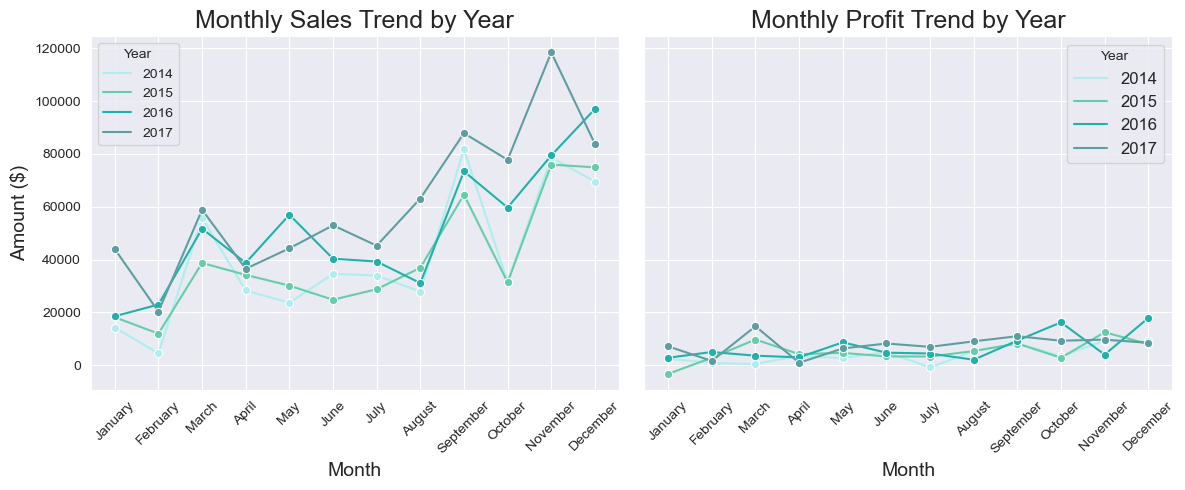

In [15]:
OrderedMonths = ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']

MonthlySales = orders.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
MonthlySales['Month'] = pd.Categorical(MonthlySales['Month'], categories=OrderedMonths, ordered=True)

MonthlyProfit = orders.groupby(['Year', 'Month'])['Profit'].sum().reset_index()
MonthlyProfit['Month'] = pd.Categorical(MonthlyProfit['Month'], categories=OrderedMonths, ordered=True)

monthly = pd.merge(MonthlySales, MonthlyProfit, on=['Year', 'Month'], how='left') # this is for later for the growth rates portion

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Monthly Sales Trend by Year
sns.lineplot(data=MonthlySales, x='Month', y='Sales', hue='Year', marker='o', palette=palette_trends, ax=ax1)
ax1.set_title('Monthly Sales Trend by Year', fontsize=18)
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Amount ($)', fontsize=14)
ax1.tick_params(axis='x', rotation=45)

# Monthly Profit Trend by Year
sns.lineplot(data=MonthlyProfit, x='Month', y='Profit', hue='Year', marker='o', palette=palette_trends, ax=ax2)
ax2.set_title('Monthly Profit Trend by Year', fontsize=18)
ax2.set_xlabel('Month', fontsize=14)
ax2.legend(title='Year', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Observations

#### 1. **Sales Performance**  
- **Sales demonstrate consistent growth from 2014 to 2017**, showing a steady upward trend year-over-year.
- The highest sales recorded were in **November 2017**, with a total of **\$118,447.83**
- **March 2014 shows an unusually high sales number of \$55,691.01**, which doesnt match the pattern shown in other years. But this month also corresponds with a very low profit, suggesting high costs or low margin products.
  
#### 2. **Profit Perfomrance**
- **Profit trends are less consistent**, with some similarities to sales but lacking the same predictable pattern year-over-year.
- There are **several months showing negative profit**.
- Profits still seem to **show a gradual increase over time** (year-over-year
- During the data cleaning process, it was discovered that **discounts were the primary driver of negative profits**
- **December 2016** had the highest profit at **\$17,885.31**, this occured during the second highest peak for sales.
- Many months, especially towards the **end of each year, show higher profits**, such as December 2015 with **\$8,016.97** and December 2017 with **\$8,483.35**.
  
#### 3. **Profit vs. Sales**
- Note that in **November 2017, sales peaked at their highest level** across the four years, yet **profits did not reach their peak** at the same time.
- **Profit margins are inconsistent**, even though sales often show high values. For example, in July 2014, sales were high at **\$33,946.39**, but profit was negative. Similarly, October 2016 saw a strong profit of **\$16,243.14** but relatively moderate sales **\$59,687.74**.
- There seems to be an **inverse relationship between sales and profit in some months**, where high sales are not always proportionate to profits.

#### 4. **Seasonal Trends (Sales)**
- Overall, the **sales trends follow a similar cyclical pattern year after year**, with recurring peaks and dips.
  - **February consistently shows the lowest sales across all four years**, with each dip followed by a noticeable sales peak in March.
  - **Sales experience a notable spike in September**, followed by a decline in October and another peak in November. This trend appears to align with back-to-school patterns
  - **Sales trends show a recurring dip each year after January**, with notable declines in February and March, hitting the **lowest point in March 2014**.
  - **Year-end sales (November and December) consistently show higher sales figures**. December 2016 stands out with both the highest sales and highest profit
  - **Summer months (June to August) seem to be a period of strong sales** with varied profit outcomes, suggesting seasonality in business cycles.

### 2. **Dimensional Segments: Quarter, Year** 
What are sales by Quarter? By Year?

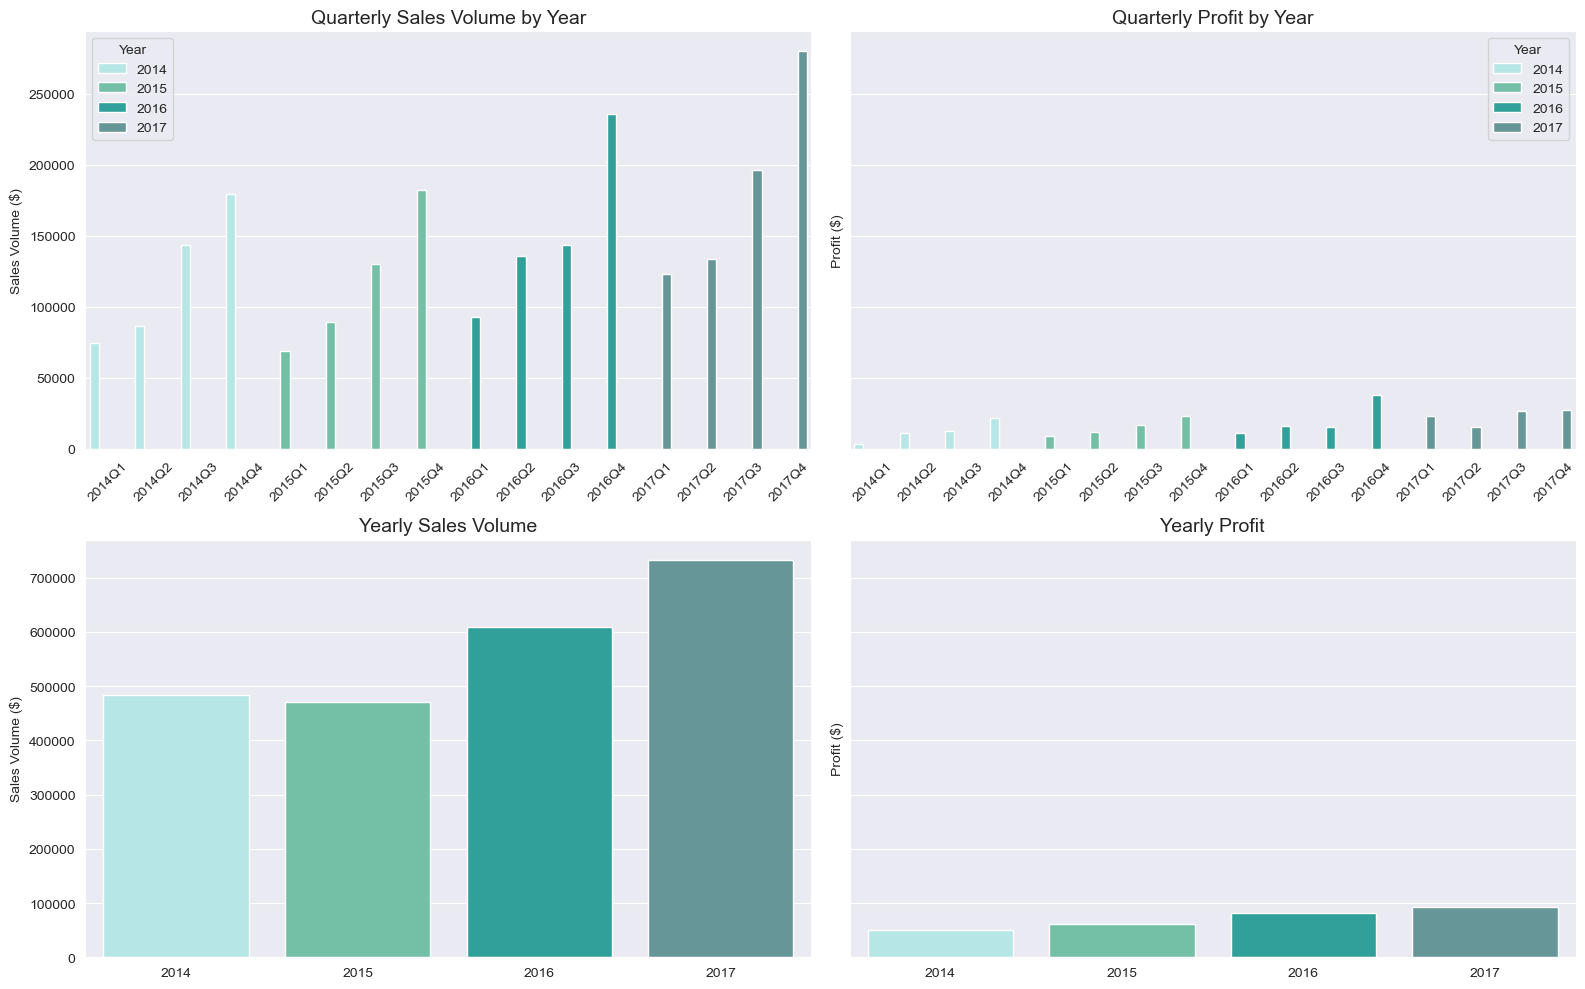

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey='row')

# Quarterly Sales and Profit
QuarterlySalesProfit = orders.groupby(['Year', 'Quarter'])[['Sales', 'Profit']].sum().reset_index()
QuarterlySalesProfit['Year'] = QuarterlySalesProfit['Year'].astype(str)

sns.barplot(data=QuarterlySalesProfit, x='Quarter', y='Sales', hue='Year', palette=palette_trends, ax=axes[0, 0])
axes[0, 0].set_title("Quarterly Sales Volume by Year", fontsize=14)
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Sales Volume ($)")
axes[0, 0].tick_params(axis='x', rotation=45)

sns.barplot(data=QuarterlySalesProfit, x='Quarter', y='Profit', hue='Year', palette=palette_trends, ax=axes[0, 1])
axes[0, 1].set_title("Quarterly Profit by Year", fontsize=14)
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("Profit ($)")
axes[0, 1].tick_params(axis='x', rotation=45)

# Yearly Sales and Profit
yearly_sales_profit = orders.groupby('Year')[['Sales', 'Profit']].sum().reset_index()

sns.barplot(data=yearly_sales_profit, x='Year', y='Sales', palette=palette_trends, ax=axes[1, 0])
axes[1, 0].set_title("Yearly Sales Volume", fontsize=14)
axes[1, 0].set_xlabel("")
axes[1, 0].set_ylabel("Sales Volume ($)")

sns.barplot(data=yearly_sales_profit, x='Year', y='Profit', palette=palette_trends, ax=axes[1, 1])
axes[1, 1].set_title("Yearly Profit", fontsize=14)
axes[1, 1].set_xlabel("")
axes[1, 1].set_ylabel("Profit ($)")

plt.tight_layout()
plt.show()

**Sales**
- Sales follow the same ranking each year: **Q1 < Q2 < Q3 < Q4**.
- **2014** has the **lowest** yearly sales volume (484,247.4981)
- **2017** has the **highest** yearly sales volume (733,215.2552)

**Profit**
- **Profits mostly align with sales**, following the same ranking as sales for 2014, 2015, and 2016.
- In **2017, profits deviate from sales ranking**: Q2 < Q1 < Q3 < Q4. Interestingly, this does not align with the sales volume ranking so contrary to expectations that higher sales would result in higher profit, Q1 had lower sales than Q2 but achieved a higher profit. Notably, the sales volumes for Q1 and Q2 of 2017 are close, with a difference of only about $10,000.
- **2014** has the **lowest** profit (49,543.9741)
- **2017** has the **highest** profit (93,439.2696)

### 3. **Summary Statistics:** 
What months have the highest and lowest sales? Which product (or country or region) have highest or lowest sales? What was avg sales across time?

In [23]:
# Top 3 Months (w/ Year) TODO MAke date better (don't want day)
html = f"""
<div style="display: flex; justify-content: space-between; align-items: flex-start;">
    <div style="width: 45%;">
        <h3>Top 3 Months by Sales</h3>
        {MonthlyData.nlargest(3, 'Sales').to_html()}
    </div>
    <div style="width: 45%;">
        <h3>Top 3 Months by Profit</h3>
        {MonthlyData.nlargest(3, 'Profit').to_html()}
    </div>
</div>
"""
display(HTML(html))

# Bottom 3 Months (w/ Year)
html = f"""
<div style="display: flex; justify-content: space-between; align-items: flex-start;">
    <div style="width: 45%;">
        <h3>Bottom 3 Months by Sales</h3>
        {MonthlyData.nsmallest(3, 'Sales').to_html()}
    </div>
    <div style="width: 45%;">
        <h3>Bottom 3 Months by Profit</h3>
        {MonthlyData.nsmallest(3, 'Profit').to_html()}
    </div>
</div>
"""
display(HTML(html))

,Year-Month,Sales,Profit
46,2017-11-01,118447.825,9690.1037
35,2016-12-01,96999.043,17885.3093
44,2017-09-01,87866.652,10991.5556
,Year-Month,Sales,Profit
35,2016-12-01,96999.0430,17885.3093
33,2016-10-01,59687.7450,16243.1425
38,2017-03-01,58872.3528,14751.8915


,Year-Month,Sales,Profit
1,2014-02-01,4519.892,862.3084
13,2015-02-01,11951.411,2813.8508
0,2014-01-01,14236.895,2450.1907
,Year-Month,Sales,Profit
12,2015-01-01,18174.0756,-3281.0070
6,2014-07-01,33946.3930,-841.4826
2,2014-03-01,55691.0090,498.7299


**Highest Sales and Profit**
- **November 2017:** Achieved the highest **sales** (118,447.83) and a decent profit (9,690.10)
- **December 2016:** Achieved the highest **profit** (17,885.31) despite lower sales (96,999.04) compared to November 2017.

**Lowest Sales and Profit**
- **February 2014:** The lowest **sales** (4,519.89) and minimal profit (862.31)
- **January 2015:** The lowest **profit** (-3,281.01), which is negative indicating losses. It has the lowest profit despite the higher sales (18,174.08) than February 2014.

**Unexpected Profit Trends**
- **December 2016:** Despite lower sales compared to November 2017, it achieved a much higher profit.
  - Dec 2016: (sales: 96,999.04, profit: 17,885.3093)
  - Nov 2017: (sales: 118,447.825, profit: 9,690.1037)
  - This suggests effective cost management or high-margin sales.
- **July 2014:** Sales volume was moderate, but the month still incurred losses, indicating potential inefficiencies.

In [26]:
SummaryStats = orders[['Sales', 'Profit', 'Quantity', 'Discount']].describe().T

SummaryStats['median'] = orders[['Sales', 'Profit', 'Quantity', 'Discount']].median()

SummaryStats = SummaryStats.round(2)

SummaryStats.style.background_gradient(cmap="BuGn").set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f1f1f1'), ('font-weight', 'bold')]}]
)

,count,mean,std,min,25%,50%,75%,max,median
Sales,9994.000000,229.860000,623.250000,0.440000,17.280000,54.490000,209.940000,22638.480000,54.490000
Profit,9994.000000,28.660000,234.260000,-6599.980000,1.730000,8.670000,29.360000,8399.980000,8.670000
Quantity,9994.000000,3.790000,2.230000,1.000000,2.000000,3.000000,5.000000,14.000000,3.000000
Discount,9994.000000,0.160000,0.210000,0.000000,0.000000,0.200000,0.200000,0.800000,0.200000


**Sales**
- **Average Sales:** per order are 229.86, with a high standard deviation (623.25)
- **Range:** The lowest sale for an order was 0.44, and the highest was 22,638.48
- **Median:** 54.49, suggesting that most orders have low sales relative to the average sales per order. This could be a result of large orders (for example the order of 22,638.48) skewing the average. 

**Profit**
- **Average Profit:** 28.66 per order, with a high standard deviation (234.26)
- **Range:** The lowest profit for an order was -6,599.98, and the highest was 8,399.98
- **Median:** 8.67
  
**Quantity**
- **Average Quantity:** 3.79 per order (round to 3 because these can only be integer values), with a standard deviation of 2.23 indicating small-sized orders dominate.
- **Range:** orders ranged from 1-14 units, with the majority around 3 units (median = 3).
  
**Discount**
- **Average Discount:** 16%
- **Range:** 0% to 80%
- **Median:** 20%

### 4. **Distribuion** 
Which products make up the top X% of sales? This is where I'm just taking a metric and slicing it by a specified dimension to understand how that dimension makes up the overall piece of the pie.

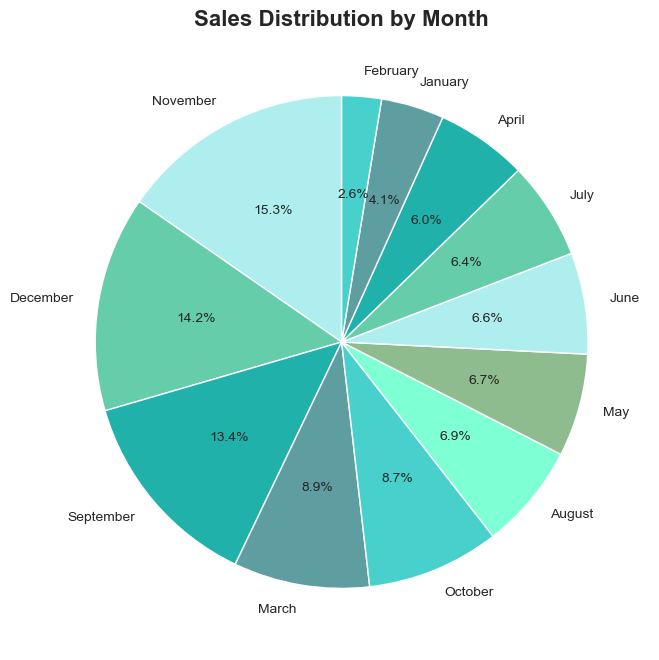

In [30]:
MonthlySales = orders.groupby('Month')['Sales'].sum().reset_index()
MonthlySales = MonthlySales.sort_values('Sales', ascending=False)
TopMonths = MonthlySales.head(12)

plt.figure(figsize=(8, 8))
plt.pie(
    TopMonths['Sales'], 
    labels=TopMonths['Month'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=palette_trends[:len(TopMonths)] )
    
plt.title("Sales Distribution by Month", fontsize=16, fontweight='bold')
plt.show()

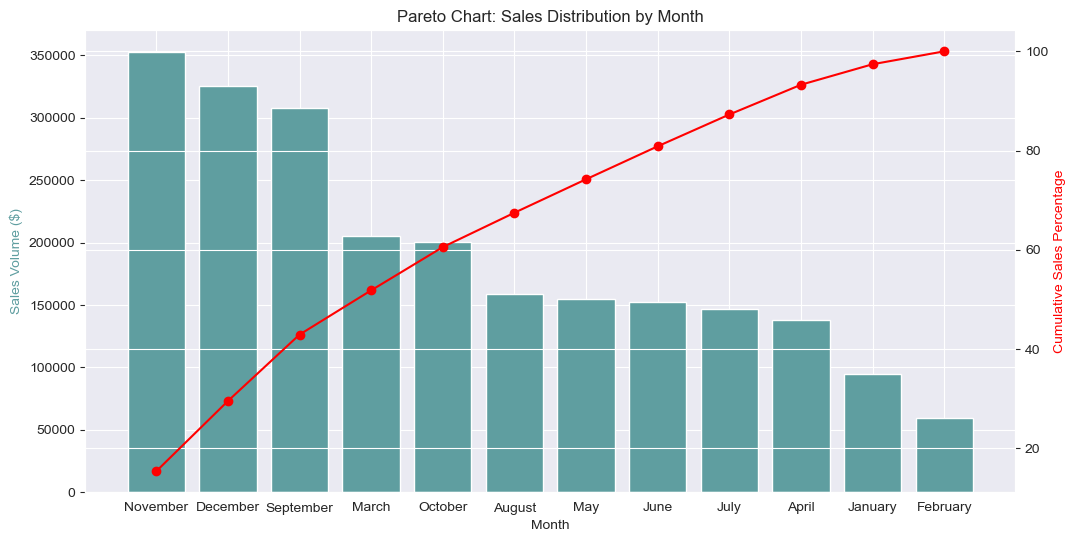

In [32]:
MonthlySales['Cumulative Sales'] = MonthlySales['Sales'].cumsum()
MonthlySales['Cumulative %'] = (MonthlySales['Cumulative Sales'] / MonthlySales['Sales'].sum()) * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(MonthlySales['Month'], MonthlySales['Sales'], color="#5f9ea0")
ax1.set_xlabel("Month")
ax1.set_ylabel("Sales Volume ($)", color="#5f9ea0")

ax2 = ax1.twinx()
ax2.plot(MonthlySales['Month'], MonthlySales['Cumulative %'], color='r', marker='o')
ax2.set_ylabel("Cumulative Sales Percentage", color='r')

plt.title("Pareto Chart: Sales Distribution by Month")
plt.show()

- **November** makes up the largest % of sales with **15.3%** 
- **September to December makes up over half of all sales with 51.6%** happening in those four months.
- **February** makes up the smallest % of sales with only **2.6%**

---
# Overall Trends Section Summary
### Overall and Monthly Trends
- **Sales Growth:** Steady increase from 2014–2017, peaking in November 2017 (118K).
- **Profit Trends:** Inconsistent but rising overall; December 2016 had the highest profit (17.9K).
- **Sales vs. Profit:** High sales didn’t always mean high profits due to discounts and margin issues.
- **Seasonality:** Sales dipped in February and peaked in March, September, and November–December.
### Dimensional Segments: Quarter, Year
- **Sales Growth:** Sales consistently ranked Q1 < Q2 < Q3 < Q4 each year.
- **Highest/Lowest Sales:** 2014 had the lowest sales ($484K), while 2017 had the highest ($733K).
- **Profit Trends:** Profit followed sales ranking until 2017, when Q1 profit exceeded Q2 despite lower sales.
- **Highest/Lowest Profit:** 2014 had the lowest profit ($49.5K), and 2017 had the highest ($93.4K).

### Summary Statistics
**Highest Sales and Profit**
- **November 2017:** Highest sales (118,447.83) with solid profit (9,690.10).
- **December 2016:** Highest profit (17,885.31) despite lower sales (96,999.04).

**Lowest Sales and Profit**
- **February 2014:** Lowest sales (4,519.89) with minimal profit ($862.31).
- **January 2015:** Lowest profit (-3,281.01) despite higher sales (18,174.08) than February 2014.
  
**Unexpected Profit Trends**
- **December 2016:** Outperformed November 2017 in profit despite lower sales, suggesting better cost control or high-margin sales.
- **July 2014:** Moderate sales but incurred losses, hinting at inefficiencies.

**Sales Insights**
- **Average Sale:** 229.86 per order (highly skewed by large orders).
- **Range:** 0.44 to 22,638.48; Median: 54.49.

**Profit Insights**
- **Average Profit:** 28.66 per order; Median: 8.67.
- **Range:** -6,599.98 to 8,399.98.

**Quantity Sold**
- Average: 3 items per order; Range: 1–14 units; Median: 3.

**Discount Trends**
- **Average Discount:** 16%; Median: 20%.
- **Range:** 0% to 80%.

### Distribution
- **November** makes up the largest % of sales with **15.3%** 
- **September to December makes up over half of all sales with 51.6%** happening in those four months.
- **February** makes up the smallest % of sales with only **2.6%**

# Actionable Insights/Reccomendations
1. **Optimize Discount Strategy:** Limit discounts over 20% and target high-margin products for strategic promotions.
2. **Boost Off-Season Sales:** Use seasonal promotions (e.g., Valentine's Day) and loyalty programs to increase sales in February and Q1.
3. **Leverage Peak Months:** Focus on upselling, bundling, and managing inventory in September–December to maximize sales.
4. **Improve Cost Efficiency:** Analyze high-sales, low-profit months (e.g., November 2017) to reduce costs and improve margins.
5. **Expand Marketing Efforts:** Focus on digital campaigns and event-based promotions to drive sales year-round.